In [758]:
%pip install keras_preprocessing
%pip install matplotlib
%pip install idx2numpy
%pip install pillow



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [759]:
!pip install ipykernel

In [760]:

%pip install manim
# %pip install IPython --upgrade
%pip install colour
# %%python -m pip install --upgrade pip
%pip install tensorflow
%pip install matplotlib
%pip install tensorflow.keras

  Using cached manim-0.19.0-py3-none-any.whl.metadata (11 kB)
  Using cached av-13.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloup-3.0.7-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached isosurfaces-0.1.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached manimpango-0.6.0.tar.gz (4.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      Package 'pangocairo' was not found
      Traceback (most recent call last):
        File "<string>", line 137, in check_min_version
        File "/usr/lib64/python3.11/subprocess.py", line 413, in check_call
          raise CalledProcessError(retcode, cmd)
      subprocess.

In [761]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt
import idx2numpy
import keras_preprocessing
import tensorflow as tf
import numpy as np
import keras

In [762]:
!python3 -m pip install --upgrade pip

In [763]:
os.system("rm ./simulation/I.txt")

0

In [764]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [765]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

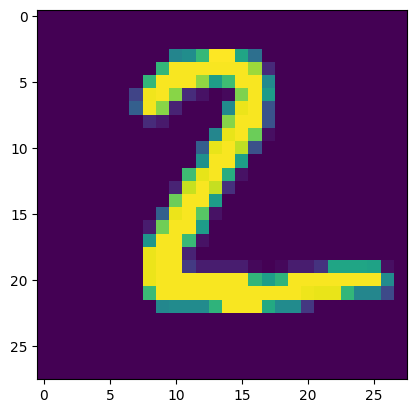

In [766]:
array = idx2numpy.convert_from_file(path)[1]
plt.imshow(array)
# array

In [767]:

k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int((((j/255.0)*2**1))))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [768]:
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2))
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1))
    # print(integ,'h')

    return [a]

In [769]:
keras.__version__

'3.8.0'

In [770]:
!pip install tensorflow==2.18.0
!pip install keras==3.8.0

In [771]:
import keras
import tensorflow as tf

In [772]:
keras.__version__

'3.8.0'

In [773]:
tf.__version__

'2.18.0'

In [774]:
modelo_dig = tf.keras.models.load_model("model_network/handwrittenDigitClassifier.h5")

In [775]:
modelo_dig.predict(array.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[6.7259549e-05, 5.9630045e-05, 9.9896216e-01, 5.0340185e-04,
        1.0950127e-08, 2.7365413e-06, 2.7112037e-04, 2.5693270e-09,
        1.3364937e-04, 5.9271804e-10]], dtype=float32)

In [776]:
modelo_dig.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 12, 12, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 10, 10, 4)      │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140 (4.46 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [777]:
# !sudo apt-get install graphviz

In [778]:
!pip install pydot
!pip install pydotplus
!pip install graphviz
# from keras.utils import plot_model

In [779]:
# plot_model(
#     modelo_dig,
#     show_shapes=True,
#     show_layer_names=True,
# )

In [780]:
# modelo_dig.Sequential.call()

In [781]:
kernels = modelo_dig.weights[5]
# kernel0 = kernels[:,:,:,0]

# kernels

In [782]:
# base = 

In [783]:
NBITS = 128

In [784]:
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))


In [785]:
def bias_txt(i,bias,string='bias'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(bias)
    base = 8
    for j in kernel0_0:
        # for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),NBITS)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        # ker.write("\n")
            # print('\n')
    ker.close()

In [786]:
bias = np.array(modelo_dig.weights[1])
bias

array([0.19534911, 0.8480951 ], dtype=float32)

In [787]:
bias_txt(0,modelo_dig.weights[1])

50 217 

In [788]:
bias_txt(5,modelo_dig.weights[5])

-2 62 -51 -102 -7 -85 -18 -69 21 3 

In [789]:
cc = modelo_dig.weights[4]


In [790]:
bias_txt(2,modelo_dig.weights[1])

50 217 

In [791]:
modelo_dig.weights[0]
kernels = modelo_dig.weights[0]
kernels

<Variable path=sequential_20/conv2d_32/kernel, shape=(5, 5, 1, 2), dtype=float32, value=[[[[ 0.9722663  -0.9194094 ]]

  [[ 1.047803   -0.02296303]]

  [[ 0.62444824 -0.08609035]]

  [[ 0.5809669   0.55906385]]

  [[ 1.064917    0.33499083]]]


 [[[ 0.74652195 -0.35451314]]

  [[ 0.91592014 -0.58592343]]

  [[ 1.3482357   0.19283031]]

  [[ 1.0461178   0.48792654]]

  [[ 1.509114    0.3086833 ]]]


 [[[ 0.710713   -0.14828633]]

  [[ 0.25220433 -0.11597386]]

  [[ 0.542772    0.6169319 ]]

  [[ 0.18383642  0.23711862]]

  [[ 0.3314154   0.20575105]]]


 [[[-0.04414033  0.20724198]]

  [[ 0.47112525  0.5409466 ]]

  [[-0.7199017   0.61755383]]

  [[-0.73129714  1.0653108 ]]

  [[-0.17994994  0.69259036]]]


 [[[ 0.31371403  0.8943217 ]]

  [[-0.190044    0.91786027]]

  [[ 0.0034629   0.97252643]]

  [[ 0.00448792  0.51279104]]

  [[-0.5699434   0.70536715]]]]>

In [792]:
bias_txt(2,modelo_dig.weights[3])


-217 -143 -109 -9 

In [793]:
def kernel_txt(i,j,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{j}{i}.txt",'w')
    kernel0_0 = np.array(kernel)
    base = 8
    for i in kernel0_0:
        for j in i:
            print(int((j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),NBITS)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [794]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(i,0,kernels[:,:,0,i])
    print("--------------------------------------------------------------------",i+1)

248 268 159 148 272 

191 234 345 267 386 

181 64 138 47 84 

-11 120 -184 -187 -46 

80 -48 0 1 -145 

-------------------------------------------------------------------- 1
-235 -5 -22 143 85 

-90 -149 49 124 79 

-37 -29 157 60 52 

53 138 158 272 177 

228 234 248 131 180 

-------------------------------------------------------------------- 2


kernel0

In [795]:
modelo_dig.weights[2][:,:,0,3]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.35626814, -1.0724535 , -0.04308442],
       [-0.34540957, -0.56098855,  0.16657232],
       [-0.29339585, -0.03906389, -0.22032611]], dtype=float32)>

In [796]:
# kernel_txt(i,kernels2d_1[:,:,0,0],string="kernels2d_1_")


In [797]:
kernels2d_1 = modelo_dig.weights[2]
# kernels2d_1[:,:,:,0]
# kernel_txt(0,kernels2d_1[:,:,:,0])

lims = np.array(kernels2d_1.shape)[::-1][0]
limi = np.array(kernels2d_1.shape)[::-1][1]
(lims,limi)

(np.int64(4), np.int64(2))

In [798]:
kernels2d_1

<Variable path=sequential_20/conv2d_33/kernel, shape=(3, 3, 2, 4), dtype=float32, value=[[[[-2.4784669e-01 -6.8650499e-02  7.6521888e-02  3.5626814e-01]
   [ 3.4627190e-01 -7.6966101e-01  1.1148270e-03 -6.0281855e-01]]

  [[ 3.9189037e-02  6.6975915e-01 -4.3174767e-01 -1.0724535e+00]
   [ 3.6813590e-01 -7.8958553e-01 -4.1217718e-01  3.3371231e-01]]

  [[-6.7271852e-01  5.8461076e-01  4.8360988e-02 -4.3084420e-02]
   [-7.6100871e-02 -7.1687686e-01  2.0701836e-01  4.1828957e-01]]]


 [[[-5.4852091e-02 -1.2594682e+00  6.1447424e-01 -3.4540957e-01]
   [ 1.3505653e-01  7.3020570e-02 -4.7604364e-01 -2.6451221e-01]]

  [[ 3.4326580e-01 -5.2477151e-01  5.1117313e-01 -5.6098855e-01]
   [-2.9595885e-01 -6.7089815e-03 -5.1386636e-01  2.7347332e-01]]

  [[ 1.6897665e-01 -4.5126066e-01  1.0741811e+00  1.6657232e-01]
   [ 1.7480990e-01 -2.2774774e-01 -8.7296033e-01  5.9252042e-01]]]


 [[[-5.8154710e-02 -5.1161539e-02  4.1082335e-01 -2.9339585e-01]
   [-1.3120303e+00  5.3310108e-01 -4.6876642e-01 -9

In [799]:
kernels2d_1[:,:,j,i]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.0686505 ,  0.66975915,  0.58461076],
       [-1.2594682 , -0.5247715 , -0.45126066],
       [-0.05116154,  0.06137663,  0.19713688]], dtype=float32)>

In [800]:
kernels2d_1 = modelo_dig.weights[2]
# kernels2d_1[:,:,:,0]
# kernel_txt(0,kernels2d_1[:,:,:,0])

lims = int(np.array(kernels2d_1.shape)[::-1][0])
limi = int(np.array(kernels2d_1.shape)[::-1][1])

for i in range(lims):
    for j in range(limi):
        kernel_txt(i,j,kernels2d_1[:,:,j,i],string=f"kernels2d_{j}_")
        # print(kernels2d_1[:,:,j,i])

        print("-------------------------------",i)

-63 10 -172 

-14 87 43 

-14 114 271 

------------------------------- 0
88 94 -19 

34 -75 44 

-335 -196 -133 

------------------------------- 0
-17 171 149 

-322 -134 -115 

-13 15 50 

------------------------------- 1
-197 -202 -183 

18 -1 -58 

136 89 68 

------------------------------- 1
19 -110 12 

157 130 274 

105 -5 -145 

------------------------------- 2
0 -105 52 

-121 -131 -223 

-120 -110 89 

------------------------------- 2
91 -274 -11 

-88 -143 42 

-75 -10 -56 

------------------------------- 3
-154 85 107 

-67 70 151 

-23 20 -8 

------------------------------- 3


In [801]:
kernels2d_1[:,:,:,3]

<tf.Tensor: shape=(3, 3, 2), dtype=float32, numpy=
array([[[ 0.35626814, -0.60281855],
        [-1.0724535 ,  0.3337123 ],
        [-0.04308442,  0.41828957]],

       [[-0.34540957, -0.2645122 ],
        [-0.56098855,  0.27347332],
        [ 0.16657232,  0.5925204 ]],

       [[-0.29339585, -0.09137326],
        [-0.03906389,  0.07917245],
        [-0.22032611, -0.03283384]]], dtype=float32)>

In [868]:
dense = np.array(cc)

In [802]:
kernel_txt(0,0,cc,string="danse.txt")

-207 -10 20 28 -78 -72 -289 176 -139 -370 

-7 -12 -103 -67 -23 -229 -147 -36 46 -15 

-209 -131 149 139 -174 -451 -131 -78 -148 30 

-8 25 -69 -53 27 -51 -16 37 34 -27 

-77 -105 33 144 -431 -87 -524 4 -11 -137 

23 -259 -54 -152 42 -117 -75 -45 73 131 

-158 -375 38 81 -298 -241 -57 -170 63 -86 

-29 32 -15 -135 35 -56 -84 -56 104 41 

-43 -260 17 76 -461 -96 -355 -134 91 130 

-83 -148 -24 -6 -105 -6 -142 -2 -130 102 

-4 -427 20 -225 -289 60 27 -293 125 -10 

14 31 -144 -64 -101 -62 -108 -36 -13 11 

14 -503 -14 -38 -525 51 -29 -116 159 93 

-8 -16 -84 -141 -50 -19 -122 22 -123 60 

-43 160 -72 -119 -240 70 171 -507 -42 -262 

-91 -46 -190 -132 95 45 6 1 -1 -147 

-91 -80 -251 -220 -194 305 199 -325 -38 -204 

-66 -161 -199 -159 -51 79 -40 1 65 6 

-239 87 -166 -25 258 32 48 -144 -141 -430 

-115 72 -132 -220 26 198 21 -85 12 -169 

-244 -89 42 41 -186 -195 -311 -10 -31 -179 

34 -88 186 22 -2 -309 -155 101 -139 -84 

-265 -131 64 279 -319 -319 -392 237 -278 -366 

79 -50 -77 -230 

In [803]:
out = open("simulation/IxKernel1.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [804]:
# array_out =[]

# for i in range(1):
#     array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
# klin2 = []
# plt.figure(figsize=(30,2))
# for ii in range(2):
#     k2 = array_out[ii].readlines()
#     m2=[]
#     for i in k2:
#         m2.append(list(map(concat,i.split())))
#     plt.subplot(1,2,ii+1)
#     plt.imshow(m2,cmap="gray")
# # plt.imshow(m2)

# for i in range(2):
#     array_out[i].close()


In [805]:
# m2

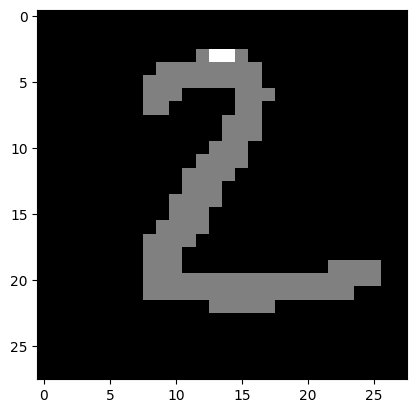

In [806]:
out2 = open("./simulation/I.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat,i.split())))
plt.imshow(m2,cmap="gray")


In [807]:
m2

[[[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [1],
  [2],
  [2],
  [1],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
 

In [808]:
array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

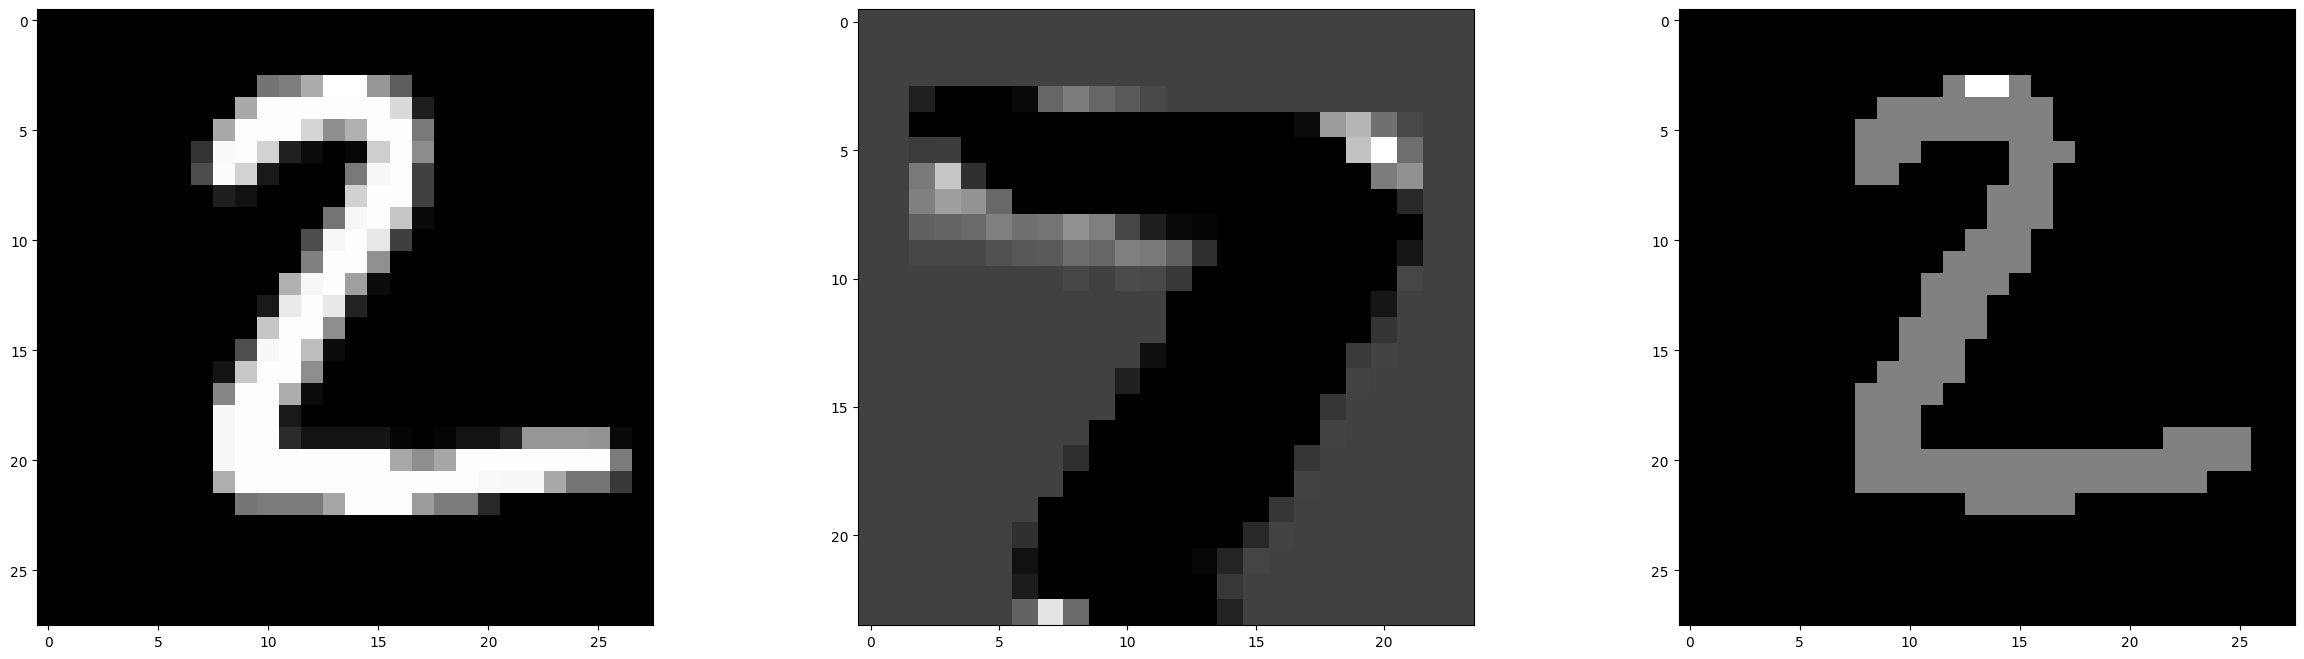

In [809]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(m1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(m2,cmap="gray")
plt.show()


In [810]:
m2

[[[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [1],
  [2],
  [2],
  [1],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]],
 [[0],
  [0],
 

In [811]:
plt.imsave("7.png",array,cmap="gray")

In [812]:
# plt.imsave()

In [813]:
# img.save_img("./images/preprocessamento.jpg",array)


In [814]:
# os.system("rm ./images/preprocessamento.jpg")
# os.system("rm ./images/posprocessamento.jpg")

# img.save_img("./images/preprocessamento.jpg",array)
# img.save_img("./images/posprocessamento.jpg",m1)
# img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


In [815]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat,i.split()))[0][0])
m2 = np.array(m2)
print(np.array(m2))

[-1044569448 -1850951390  -497793968  -987024846 -1534142798  -755525310
  -205519599   -73406064  -335344373 -1942651778]


hex(1)

In [829]:
def concat2(n,mask=16,bits=32):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    print(integ)
    integ = ('0'*(bits-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2))
    # print(a)
    if(str(integ[0])=='1'):
        print("Aqui",a,integ)
        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1))
    # print(integ,'h')

    return [a/2**mask]
concat2(n=str("fffffff"),mask=16)

0b1111111111111111111111111111


[4095.999984741211]

Aqui 344469 1010100000110010101
Aqui 878747 11010110100010011011
Aqui 841445 11001101011011100101
Aqui 59533 1110100010001101
Aqui 84150 10100100010110110
Aqui 181534 101100010100011110
Aqui 205828 110010010000000100
Aqui 183252 101100101111010100
Aqui 441781 1101011110110110101
Aqui 1086787 100001001010101000011
Aqui 1257740 100110011000100001100
Aqui 1396299 101010100111001001011
Aqui 1363265 101001100110101000001


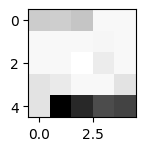

In [817]:
out2 = open("./simulation/maxpoolingF1.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat2,i.split())))
plt.subplot(1,4,1)
plt.imshow(m2,cmap="gray")

Aqui 344469 1010100000110010101
Aqui 878747 11010110100010011011
Aqui 841445 11001101011011100101
Aqui 59533 1110100010001101
Aqui 84150 10100100010110110
Aqui 181534 101100010100011110
Aqui 205828 110010010000000100
Aqui 183252 101100101111010100
Aqui 441781 1101011110110110101
Aqui 1086787 100001001010101000011
Aqui 1257740 100110011000100001100
Aqui 1396299 101010100111001001011
Aqui 1363265 101001100110101000001
Aqui 166502 101000101001100110
Aqui 276120 1000011011010011000
Aqui 89158 10101110001000110
Aqui 138432 100001110011000000
Aqui 443754 1101100010101101010
Aqui 422879 1100111001111011111
Aqui 632141 10011010010101001101
Aqui 565398 10001010000010010110
Aqui 135338 100001000010101010
Aqui 128700 11111011010111100
Aqui 133053 100000011110111101
Aqui 169380 101001010110100100
Aqui 320699 1001110010010111011
Aqui 77889 10011000001000001
Aqui 240372 111010101011110100
Aqui 308799 1001011011000111111
Aqui 119906 11101010001100010
Aqui 285557 1000101101101110101
Aqui 898053 110110

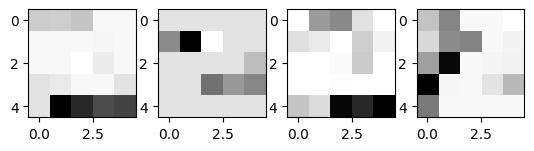

In [818]:
out2 = open("./simulation/maxpoolingF1.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat2,i.split())))
plt.subplot(1,4,1)
plt.imshow(m2,cmap="gray")
out3 = open("./simulation/maxpoolingF2.txt","r")
klin3 = []
m3=[]
k3 = out3.readlines()
for i in k3:
    m3.append(list(map(concat2,i.split())))
plt.subplot(1,4,2)
plt.imshow(m3,cmap="gray")

out3 = open("./simulation/maxpoolingF3.txt","r")
klin3 = []
m3=[]
k3 = out3.readlines()
for i in k3:
    m3.append(list(map(concat2,i.split())))
plt.subplot(1,4,3)
plt.imshow(m3,cmap="gray")


out3 = open("./simulation/maxpoolingF4.txt","r")
klin3 = []
m3=[]
k3 = out3.readlines()
for i in k3:
    m3.append(list(map(concat2,i.split())))
plt.subplot(1,4,4)
plt.imshow(m3,cmap="gray")
# m2
# m2

In [819]:
m3

[[[-1.5272064208984375],
  [-3.376434326171875],
  [0.0],
  [0.0],
  [0.19940185546875]],
 [[-0.935821533203125],
  [-3.1634521484375],
  [-3.43499755859375],
  [0.0],
  [-0.1723175048828125]],
 [[-2.63037109375],
  [-7.031463623046875],
  [0.0],
  [-0.10369873046875],
  [-0.1910247802734375]],
 [[-7.2689971923828125],
  [-0.05316162109375],
  [0.0],
  [-0.634063720703125],
  [-1.8695526123046875]],
 [[-3.7242431640625], [0.0], [0.0], [0.0], [0.0]]]

Aqui 344469 1010100000110010101
Aqui 878747 11010110100010011011
Aqui 841445 11001101011011100101
Aqui 59533 1110100010001101
Aqui 84150 10100100010110110
Aqui 181534 101100010100011110
Aqui 205828 110010010000000100
Aqui 183252 101100101111010100
Aqui 441781 1101011110110110101
Aqui 1086787 100001001010101000011
Aqui 1257740 100110011000100001100
Aqui 1396299 101010100111001001011
Aqui 1363265 101001100110101000001


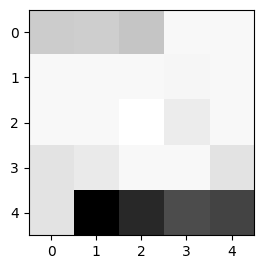

In [820]:
out3 = open("./simulation/maxpoolingF3.txt","r")
klin3 = []
m3=[]
k3 = out3.readlines()
for i in k2:
    m3.append(list(map(concat2,i.split())))
plt.subplot(1,2,2)
plt.imshow(m3,cmap="gray")


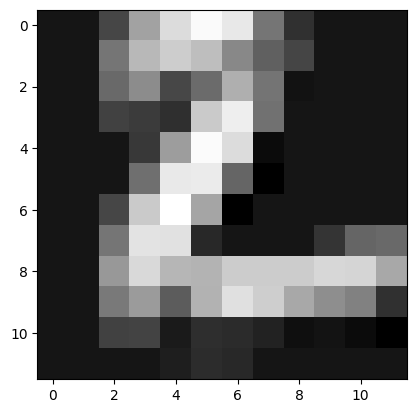

In [821]:
out2 = open("./simulation/maxpooling1.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat2,i.split())))
plt.imshow(m2,cmap="gray")
m2;


In [851]:
def concat2(n,mask=16,bits=32):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    # print(integ)
    integ = ('0'*(bits-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2))
    # print(a)
    if(str(integ[0])=='1'):
        # print("Aqui",a,integ)
        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1))
    # print(integ,'h')

    return a/(2**48)
# concat2(n=str("fffffff"),mask=16)

In [869]:
out2 = open("flatten.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat2,i.split()))[0])
# plt.imshow(m2,cmap="gray")
flatten = np.array(m2)


In [ ]:
b= np.array([1,2,3])
c =np.array([
    [1,2,1],
    [1,1,1],
    [1,2,3]
])
c@b

array([ 6, 10, 12])

In [875]:
flatten@dense

array([-1.45284102e-08, -2.58138046e-08, -6.95079701e-09, -1.37468792e-08,
       -2.13093307e-08, -4.03527889e-08, -3.27449074e-08, -1.03828141e-09,
       -3.45002093e-08, -2.70155941e-08])

In [873]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat2,i.split())))
m2 = np.array(m2)
print(np.array(m2))

[[-3.71105617e-06]
 [-6.57590032e-06]
 [-1.76851944e-06]
 [-3.50661667e-06]
 [-5.45037010e-06]
 [ 4.94522943e-06]
 [ 6.89924224e-06]
 [-2.60790728e-07]
 [ 6.43801199e-06]
 [-6.90168554e-06]]
